In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

import re, os
import unicodedata
import json

import nltk
import nltk.sentiment
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from time import strftime

from wordcloud import WordCloud

from pprint import pprint

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


import spacy
pd.set_option('display.max_colwidth', None)

# make sure these imports are before ->
import sys
directory_path = "/Users/dragonzord/Documents/SchoolDocs/codeup-data-science/exercises/methodologies2/capstone/nlp-capstone/src"
sys.path.append(directory_path)

# <- these imports
import acquire
import prepare_jag

### Acquire data

We will be using the 1000 labeled notes in `test.csv`

In [ ]:
# Import data the first time
df = prepare_jag.prep_train()

In [3]:
df.head(1)

,Unnamed: 0,id,case_num,pn_num,feature_num,feature_text,annotation,location,original,clean,stemmed,lemmatized,original_word_count
0,0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['dad with recent heart attcak'],['696 724'],"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",hpi 17yo presents palpitations patient reports 3-4 months intermittent episodes heart beating/pounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 1-3 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes vision/hearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 3-4 drinks 3 nights / week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms,hpi 17yo present palpit patient report 3-4 month intermitt episod heart beating/pound chest 2 day ago dure soccer game episod thi time chest pressur felt go pass lose concious note patient endors abus adderal primarili studi 1-3 time per week befor recent soccer game took adderral night befor morn game deni short breath diaphoresi fever chill headach fatigu chang sleep chang vision/hear abdomin paun chang bowel urinari habit pmhx none rx use friend adderral fhx mom thyroid diseas dad recent heart attcak none immun date shx freshmen colleg endors 3-4 drink 3 night / week weekend deni tabacco endors tri marijuana sexual activ girlfriend x 1 year use condom,hpi 17yo present palpitation patient report 3-4 month intermittent episode heart beating/pounding chest 2 day ago soccer game episode time chest pressure felt going pas lose conciousness note patient endorses abusing adderall primarily study 1-3 time per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fever chill headache fatigue change sleep change vision/hearing abdominal paun change bowel urinary habit pmhx none rx us friend adderrall fhx mom thyroid disease dad recent heart attcak none immunization date shx freshman college endorses 3-4 drink 3 night / week weekend denies tabacco endorses trying marijuana sexually active girlfriend x 1 year us condom,142


In [4]:
df.shape

(14300, 13)

---

Find specific ways features are written

In [7]:
features = pd.read_csv('features.csv')

In [9]:
pd.set_option('display.max_rows', 150)

In [10]:
features

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded
5,5,0,No-hair-changes-OR-no-nail-changes-OR-no-temperature-intolerance
6,6,0,Adderall-use
7,7,0,Shortness-of-breath
8,8,0,Caffeine-use
9,9,0,heart-pounding-OR-heart-racing


In [11]:
df.head()

,Unnamed: 0,id,case_num,pn_num,feature_num,feature_text,annotation,location,original,clean,stemmed,lemmatized,original_word_count
0,0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['dad with recent heart attcak'],['696 724'],"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",hpi 17yo presents palpitations patient reports 3-4 months intermittent episodes heart beating/pounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 1-3 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes vision/hearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 3-4 drinks 3 nights / week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms,hpi 17yo present palpit patient report 3-4 month intermitt episod heart beating/pound chest 2 day ago dure soccer game episod thi time chest pressur felt go pass lose concious note patient endors abus adderal primarili studi 1-3 time per week befor recent soccer game took adderral night befor morn game deni short breath diaphoresi fever chill headach fatigu chang sleep chang vision/hear abdomin paun chang bowel urinari habit pmhx none rx use friend adderral fhx mom thyroid diseas dad recent heart attcak none immun date shx freshmen colleg endors 3-4 drink 3 night / week weekend deni tabacco endors tri marijuana sexual activ girlfriend x 1 year use condom,hpi 17yo present palpitation patient report 3-4 month intermittent episode heart beating/pounding chest 2 day ago soccer game episode time chest pressure felt going pas lose conciousness note patient endorses abusing adderall primarily study 1-3 time per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fever chill headache fatigue change sleep change vision/hearing abdominal paun change bowel urinary habit pmhx none rx us friend adderrall fhx mom thyroid disease dad recent heart attcak none immunization date shx freshman college endorses 3-4 drink 3 night / week weekend denies tabacco endorses trying marijuana sexually active girlfriend x 1 year us condom,142
1,1,00041_000,0,41,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,[],[],"17 Y/O M CAME TO THE CLINIC C/O HEART POUNDING. STARTED 2-3 MO AGO. IT STARTED SUDDENLY. DOES NOT RECALL ANY TRIGGERING EVENTS. IT COMES AND GOES, IT HAPPENED 5-6 TIMES SINCE IT STARTED. IT LASTS 3-4 MIN, AFTER THAN JUST GOES AWAY. HE HAS ALSO EXPERIENCING SOB, PRESSURE ON HER CHEST WHEN HE HAS THIS ATTACK. HE IS A COLLEGE STUDENT, EXPERIENCING SOME STRESS RECENTLY. \r\nDENIES COUGH, CHEST PAIN.\r\nROS NEG EXCEPT AS ABOVE.\r\nPMH NONE. MEDS ATEROL, FOR HIS STUDIES, SHARING W HIS ROOMMATE. NKDA.\r\nPSH/ HOSP/ TRAVEL/ TRAUMA NONE.\r\nFH MOM HAS THYROID PROBLEMS.\r\nSH SEX ACTIV

In [28]:
df[df.feature_num==6].annotation.unique

<bound method Series.unique of 600              ['adderall', 'adderrall', 'adderrall']
601                                                  []
602                            ['adderall', 'Adderall']
603                                         ['aderall']
604                                        ['adderall']
605                                                  []
606                      ['aderol', 'aderol', 'aderol']
607                                        ['Adderall']
608                                        ['adderral']
609                                        ['adderall']
610                                        ['adderall']
611                                        ['Adderall']
612                                   ['uses Adderral']
613                                  ['using Adderall']
614                                          ['aderol']
615                         ['USES ADERALL', 'ADERALL']
616                              ['Addrell', 'addrell']
617              

In [31]:
df[df.feature_num==508].annotation.unique

<bound method Series.unique of 7700                                                               []
7701                                                               []
7702                                     ['nauseous during episodes']
7703                                 ['NAUSEA DURING THESE EPISODES']
7704                                                 ['assoc nausea']
7705                                                               []
7706                                                               []
7707                                   ['episodes consist of nausea']
7708                                                               []
7709                                                   ['has nausea']
7710                                                  ['with nausea']
7711                                            ['associated nausea']
7712                                              ['Endorses nausea']
7713                                                       

In [30]:
df[df.original.str.contains('denies')]


,Unnamed: 0,id,case_num,pn_num,feature_num,feature_text,annotation,location,original,clean,stemmed,lemmatized,original_word_count
0,0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['dad with recent heart attcak'],['696 724'],"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",hpi 17yo presents palpitations patient reports 3-4 months intermittent episodes heart beating/pounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 1-3 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes vision/hearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 3-4 drinks 3 nights / week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms,hpi 17yo present palpit patient report 3-4 month intermitt episod heart beating/pound chest 2 day ago dure soccer game episod thi time chest pressur felt go pass lose concious note patient endors abus adderal primarili studi 1-3 time per week befor recent soccer game took adderral night befor morn game deni short breath diaphoresi fever chill headach fatigu chang sleep chang vision/hear abdomin paun chang bowel urinari habit pmhx none rx use friend adderral fhx mom thyroid diseas dad recent heart attcak none immun date shx freshmen colleg endors 3-4 drink 3 night / week weekend deni tabacco endors tri marijuana sexual activ girlfriend x 1 year use condom,hpi 17yo present palpitation patient report 3-4 month intermittent episode heart beating/pounding chest 2 day ago soccer game episode time chest pressure felt going pas lose conciousness note patient endorses abusing adderall primarily study 1-3 time per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fever chill headache fatigue change sleep change vision/hearing abdominal paun change bowel urinary habit pmhx none rx us friend adderrall fhx mom thyroid disease dad recent heart attcak none immunization date shx freshman college endorses 3-4 drink 3 night / week weekend denies tabacco endorses trying marijuana sexually active girlfriend x 1 year us condom,142
6,6,00188_000,0,188,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['father heart attach'],['716 735'],"17 yo M college student comes to the clinic due to heart pounding. He states the he has had episodes of heart pounding for the last 3-4 months. Nothing makes it better or worse and it goes away on its own. he denies any chest pain but does report chest pressure during some of the episodes. He denies warmth or sweating, recent illness, abdominal pain or N/V, tingling in extremities, recent illness or trauma. He is new to college and has been taking aderol a few times a week. The last time he took aderol was 2 days ago, which was also the last tim

In [5]:
df.case_num.value_counts().sort_index()

0    1300
1    1300
2    1700
3    1600
4    1000
5    1800
6    1200
7     900
8    1800
9    1700
Name: case_num, dtype: int64

In [5]:
# Look at distribution of cases
cases = pd.concat([df.case_num.value_counts().sort_index(), df.case_num.value_counts(normalize = True)], axis = 1)
cases.columns = ['n', 'percent']
cases

,n,percent
0,1300,0.090909
1,1300,0.090909
2,1700,0.118881
3,1600,0.111888
4,1000,0.069930
5,1800,0.125874
6,1200,0.083916
7,900,0.062937
8,1800,0.125874
9,1700,0.118881


<AxesSubplot:title={'center':'Case Representation'}, ylabel='n'>

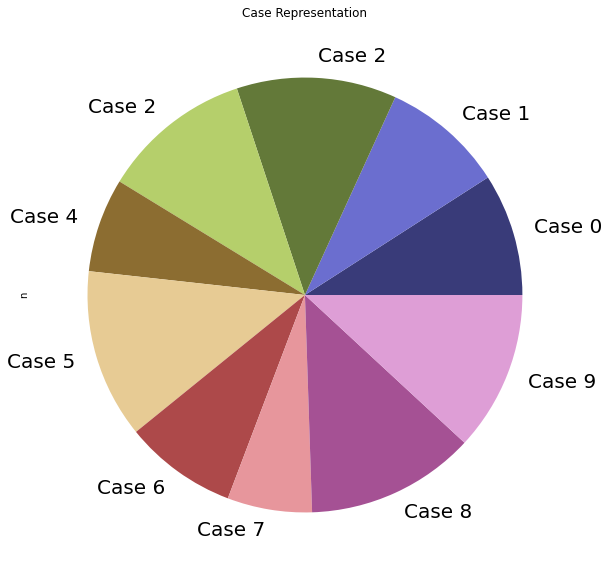

In [6]:
cases.n.plot.pie(
    figsize=[10,10], 
    title='Case Representation',
    labels=['Case 0', 'Case 1','Case 2','Case 2','Case 4','Case 5','Case 6','Case 7','Case 8','Case 9',],
    fontsize=20,
    cmap='tab20b'
    )

Make word lists by case from cleaned words



In [7]:
df.head(1)

,Unnamed: 0,id,case_num,pn_num,feature_num,feature_text,annotation,location,original,clean,stemmed,lemmatized,original_word_count
0,0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['dad with recent heart attcak'],['696 724'],"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",hpi 17yo presents palpitations patient reports 3-4 months intermittent episodes heart beating/pounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 1-3 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes vision/hearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 3-4 drinks 3 nights / week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms,hpi 17yo present palpit patient report 3-4 month intermitt episod heart beating/pound chest 2 day ago dure soccer game episod thi time chest pressur felt go pass lose concious note patient endors abus adderal primarili studi 1-3 time per week befor recent soccer game took adderral night befor morn game deni short breath diaphoresi fever chill headach fatigu chang sleep chang vision/hear abdomin paun chang bowel urinari habit pmhx none rx use friend adderral fhx mom thyroid diseas dad recent heart attcak none immun date shx freshmen colleg endors 3-4 drink 3 night / week weekend deni tabacco endors tri marijuana sexual activ girlfriend x 1 year use condom,hpi 17yo present palpitation patient report 3-4 month intermittent episode heart beating/pounding chest 2 day ago soccer game episode time chest pressure felt going pas lose conciousness note patient endorses abusing adderall primarily study 1-3 time per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fever chill headache fatigue change sleep change vision/hearing abdominal paun change bowel urinary habit pmhx none rx us friend adderrall fhx mom thyroid disease dad recent heart attcak none immunization date shx freshman college endorses 3-4 drink 3 night / week weekend denies tabacco endorses trying marijuana sexually active girlfriend x 1 year us condom,142


In [8]:
#Make word lists by case_num_xs from clean words
case0_words = ' '.join(df[df.case_num == 0].clean).split()
case1_words = ' '.join(df[df.case_num == 1].clean).split()
case2_words = ' '.join(df[df.case_num == 2].clean).split()
case3_words = ' '.join(df[df.case_num == 3].clean).split()
case4_words = ' '.join(df[df.case_num == 4].clean).split()
case5_words = ' '.join(df[df.case_num == 5].clean).split()
case6_words = ' '.join(df[df.case_num == 6].clean).split()
case7_words = ' '.join(df[df.case_num == 7].clean).split()
case8_words = ' '.join(df[df.case_num == 8].clean).split()
case9_words = ' '.join(df[df.case_num == 9].clean).split()
all_words = ' '.join(df.clean).split()


In [9]:
# Look at word list lengths
print('Case0 words: '+str(len(case0_words)))
print('Case1 words: '+str(len(case1_words)))
print('Case2 words: '+str(len(case2_words)))
print('Case3 words: '+str(len(case3_words)))
print('Case4 words: '+str(len(case4_words)))
print('Case5 words: '+str(len(case5_words)))
print('Case6 words: '+str(len(case6_words)))
print('Case7 words: '+str(len(case7_words)))
print('Case8 words: '+str(len(case8_words)))
print('Case9 words: '+str(len(case9_words)))
print('All words: '+str(len(all_words)))

Case0 words: 123994
Case1 words: 125918
Case2 words: 174437
Case3 words: 151280
Case4 words: 92630
Case5 words: 174006
Case6 words: 114888
Case7 words: 92376
Case8 words: 181890
Case9 words: 147628
All words: 1379047


In [10]:
# Calculate word frequencies
case0_freq = pd.Series(case0_words).value_counts()
case1_freq = pd.Series(case1_words).value_counts()
case2_freq = pd.Series(case2_words).value_counts()
case3_freq = pd.Series(case3_words).value_counts()
case4_freq = pd.Series(case4_words).value_counts()
case5_freq = pd.Series(case5_words).value_counts()
case6_freq = pd.Series(case6_words).value_counts()
case7_freq = pd.Series(case7_words).value_counts()
case8_freq = pd.Series(case8_words).value_counts()
case9_freq = pd.Series(case9_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [11]:
# Look at 20 most common words
word_counts = (pd.concat([all_freq, case0_freq, case1_freq, case2_freq, case3_freq, case4_freq, case5_freq, case6_freq, case7_freq, case8_freq, case9_freq], axis = 1, sort = True)
                .set_axis(['all', 'Case0', 'Case1', 'Case2', 'Case3', 'Case4', 'Case5', 'Case6', 'Case7', 'Case8', 'Case9'], axis = 1, inplace = False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))
word_counts.sort_values(by = 'all', ascending = False).head(50)

,all,Case0,Case1,Case2,Case3,Case4,Case5,Case6,Case7,Case8,Case9
no,44445,3419,4615,5780,5888,2660,6264,2820,3384,5076,4539
pain,24512,793,4966,1445,7248,530,1044,4380,792,594,2720
none,17780,1729,2132,1224,1936,1340,3654,1008,1773,774,2210
denies,17746,1807,1508,2193,1600,1570,2088,1584,1089,2250,2057
ago,16863,1248,2652,2720,848,630,4122,780,1287,1998,578
2,12248,715,1456,2295,2352,430,2088,216,1440,270,986
last,11461,1820,1898,2652,528,290,1512,732,1197,594,238
-,9681,585,663,1054,1328,570,1116,1044,612,1332,1377
pmh,9660,871,780,1224,1072,700,1116,840,621,1314,1122
weeks,9316,39,949,476,704,1130,3186,0,279,2196,357


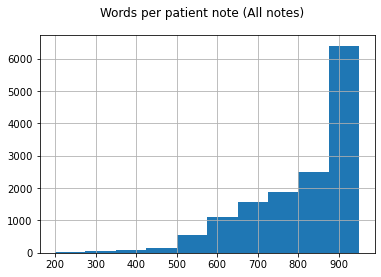

In [12]:
df['original'].str.len().hist()
plt.suptitle('Words per patient note (All notes)');


In [13]:
df.head(1)

,Unnamed: 0,id,case_num,pn_num,feature_num,feature_text,annotation,location,original,clean,stemmed,lemmatized,original_word_count
0,0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['dad with recent heart attcak'],['696 724'],"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",hpi 17yo presents palpitations patient reports 3-4 months intermittent episodes heart beating/pounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 1-3 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes vision/hearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 3-4 drinks 3 nights / week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms,hpi 17yo present palpit patient report 3-4 month intermitt episod heart beating/pound chest 2 day ago dure soccer game episod thi time chest pressur felt go pass lose concious note patient endors abus adderal primarili studi 1-3 time per week befor recent soccer game took adderral night befor morn game deni short breath diaphoresi fever chill headach fatigu chang sleep chang vision/hear abdomin paun chang bowel urinari habit pmhx none rx use friend adderral fhx mom thyroid diseas dad recent heart attcak none immun date shx freshmen colleg endors 3-4 drink 3 night / week weekend deni tabacco endors tri marijuana sexual activ girlfriend x 1 year use condom,hpi 17yo present palpitation patient report 3-4 month intermittent episode heart beating/pounding chest 2 day ago soccer game episode time chest pressure felt going pas lose conciousness note patient endorses abusing adderall primarily study 1-3 time per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fever chill headache fatigue change sleep change vision/hearing abdominal paun change bowel urinary habit pmhx none rx us friend adderrall fhx mom thyroid disease dad recent heart attcak none immunization date shx freshman college endorses 3-4 drink 3 night / week weekend denies tabacco endorses trying marijuana sexually active girlfriend x 1 year us condom,142


<AxesSubplot:>

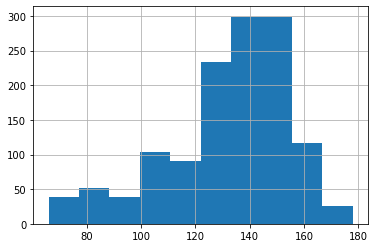

In [14]:
df[df['case_num']==0].original_word_count.hist()

In [15]:
import quantile_dotplot

In [16]:
from quantile_dotplot import ntile_dotplot


In [17]:
df[df['o']]

KeyError: 'o'

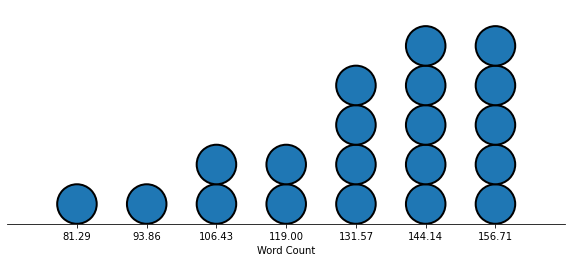

In [18]:
fig, ax = plt.subplots(figsize=(10, 4))

ax = ntile_dotplot(df[df['case_num']==0].original_word_count, dots=20, edgecolor="k", linewidth=2, ax=ax)

ax.set_xlabel("Word Count")
for spine in ("left", "right", "top"):
    ax.spines[spine].set_visible(False)
ax.yaxis.set_visible(False)

In [19]:
# Add original word count to df - now part of prepare file
#df['original_word_count']=df.original.apply(lambda x: len(str(x).split(' ')))

In [20]:
import warnings
warnings.filterwarnings("ignore")

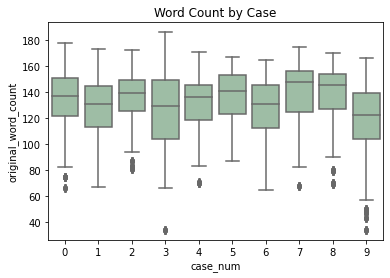

In [21]:
ax = sns.boxplot(x='case_num', y='original_word_count', data=df, color='#99c2a2')
#ax = sns.swarmplot(x="case_num", y="original_word_count", data=df, color='#7d0013')
plt.title('Word Count by Case')
plt.show();

In [22]:
import plotly.express as px


In [1]:
fig = px.violin(df, y="original_word_count", x="case_num", color="case_num", box=True, points=False,
          hover_data=df.columns)
fig.show()

NameError: name 'px' is not defined

H0: there is no difference in mean word length by case
HA: there is a difference

Distributions of word counts are not normal, so need non-parametric test. Ust Kruskal-Wallis

In [24]:
df[df.case_num==0].original_word_count

0       142
1       113
2       155
3       152
4       111
       ... 
1295    120
1296    120
1297    132
1298    153
1299    157
Name: original_word_count, Length: 1300, dtype: int64

In [25]:
from scipy import stats


In [26]:
stats.kruskal(
    df[df.case_num==0].original_word_count,
    df[df.case_num==1].original_word_count,
    df[df.case_num==2].original_word_count,
    df[df.case_num==3].original_word_count,
    df[df.case_num==4].original_word_count,
    df[df.case_num==5].original_word_count,
    df[df.case_num==6].original_word_count,
    df[df.case_num==7].original_word_count,
    df[df.case_num==8].original_word_count,
    df[df.case_num==9].original_word_count,
)

KruskalResult(statistic=933.8786503284377, pvalue=3.0963892141290268e-195)

In [27]:
from scipy.stats import alexandergovern


In [28]:
stats.alexandergovern(
    df[df.case_num==0].original_word_count,
    df[df.case_num==1].original_word_count,
    df[df.case_num==2].original_word_count,
    df[df.case_num==3].original_word_count,
    df[df.case_num==4].original_word_count,
    df[df.case_num==5].original_word_count,
    df[df.case_num==6].original_word_count,
    df[df.case_num==7].original_word_count,
    df[df.case_num==8].original_word_count,
    df[df.case_num==9].original_word_count,
)

AlexanderGovernResult(statistic=838.0707538143807, pvalue=1.352431175764315e-174)

In [29]:
from scipy.stats import f_oneway


In [30]:
stats.f_oneway(
    df[df.case_num==0].original_word_count,
    df[df.case_num==1].original_word_count,
    df[df.case_num==2].original_word_count,
    df[df.case_num==3].original_word_count,
    df[df.case_num==4].original_word_count,
    df[df.case_num==5].original_word_count,
    df[df.case_num==6].original_word_count,
    df[df.case_num==7].original_word_count,
    df[df.case_num==8].original_word_count,
    df[df.case_num==9].original_word_count,
)

F_onewayResult(statistic=110.18199977281415, pvalue=1.2045874162420276e-200)

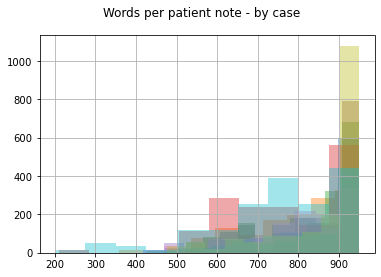

In [31]:
df[df['case_num']==0].original.str.len().hist(alpha=0.4)
df[df['case_num']==1].original.str.len().hist(alpha=0.4)
df[df['case_num']==2].original.str.len().hist(alpha=0.4)
df[df['case_num']==3].original.str.len().hist(alpha=0.4)
df[df['case_num']==4].original.str.len().hist(alpha=0.4)
df[df['case_num']==5].original.str.len().hist(alpha=0.4)
df[df['case_num']==6].original.str.len().hist(alpha=0.4)
df[df['case_num']==7].original.str.len().hist(alpha=0.4)
df[df['case_num']==8].original.str.len().hist(alpha=0.4)
df[df['case_num']==9].original.str.len().hist(alpha=0.4)
plt.suptitle('Words per patient note - by case');


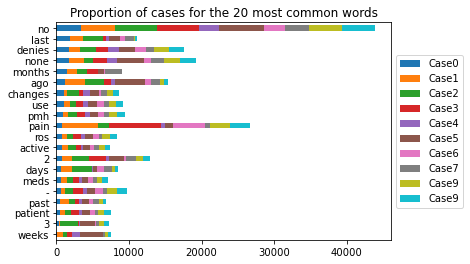

In [32]:
# figure out the percentage of language in words
(word_counts
 .assign(p_case0 = word_counts.Case0 / word_counts['all'],
        p_case1 = word_counts.Case1 / word_counts['all'],
        p_case2 = word_counts.Case2 / word_counts['all'],
        p_case3 = word_counts.Case3 / word_counts['all'],
        p_case4 = word_counts.Case4 / word_counts['all'],
        p_case5 = word_counts.Case5 / word_counts['all'],
        p_case6 = word_counts.Case6 / word_counts['all'],
        p_case7 = word_counts.Case7 / word_counts['all'],
        p_case8 = word_counts.Case8 / word_counts['all'],
        p_case9 = word_counts.Case9 / word_counts['all'])
        
 .sort_values(by = 'all')
 [['Case0', 'Case1', 'Case2', 'Case3', 'Case4', 'Case5', 'Case6', 'Case7', 'Case9', 'Case9']]
 .tail(20)
 .sort_values('Case0')
 .plot.barh(stacked=True))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.title('Proportion of cases for the 20 most common words');

### Look at bigrams by case

### Calculate all bigrams

In [33]:
case0_bigrams = (pd.Series(nltk.ngrams(case0_words, 2))
                      .value_counts()
                      .head(20))

case1bigrams = (pd.Series(nltk.ngrams(case1_words, 2))
                      .value_counts()
                      .head(20))

case2_bigrams = (pd.Series(nltk.ngrams(case2_words, 2))
                      .value_counts()
                      .head(20))

case3_bigrams = (pd.Series(nltk.ngrams(case3_words, 2))
                      .value_counts()
                      .head(20))

case4_bigrams = (pd.Series(nltk.ngrams(case4_words, 2))
                      .value_counts()
                      .head(20))

case5_bigrams = (pd.Series(nltk.ngrams(case5_words, 2))
                      .value_counts()
                      .head(20))

case6_bigrams = (pd.Series(nltk.ngrams(case6_words, 2))
                      .value_counts()
                      .head(20))

case7_bigrams = (pd.Series(nltk.ngrams(case7_words, 2))
                      .value_counts()
                      .head(20))

case8_bigrams = (pd.Series(nltk.ngrams(case8_words, 2))
                      .value_counts()
                      .head(20))

case9_bigrams = (pd.Series(nltk.ngrams(case9_words, 2))
                      .value_counts()
                      .head(20))

In [74]:
df[df.case_num==0].original[0]

'HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms'

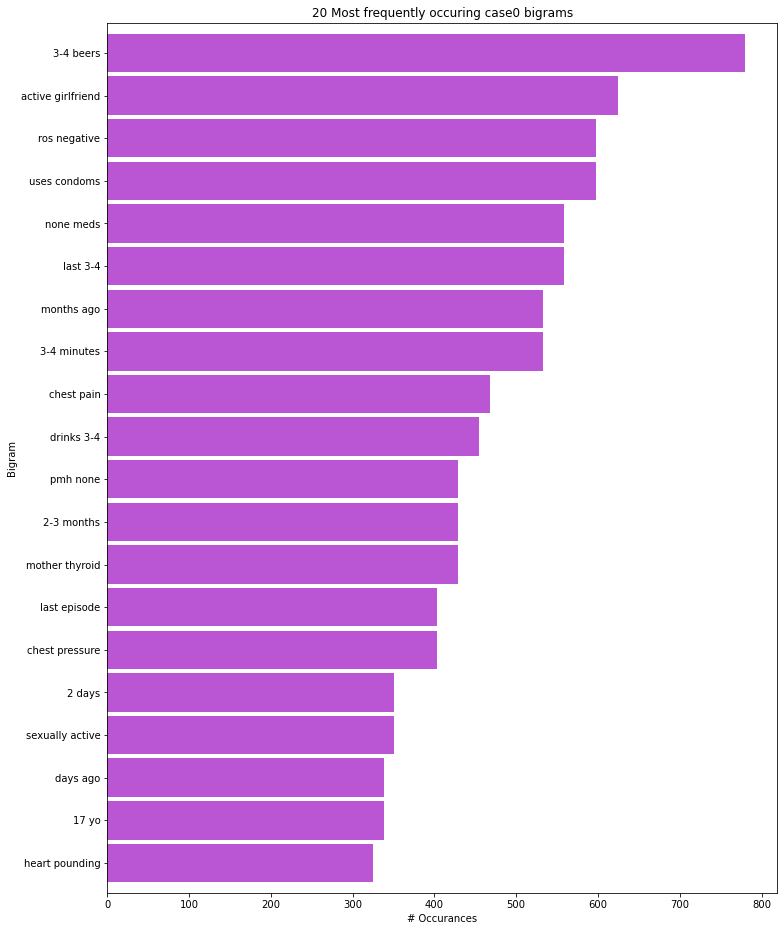

In [73]:
# Calculate Case 0bigrams
case0_bigrams = (pd.Series(nltk.ngrams(case0_words, 2))
                      .value_counts()
                      .head(20))
# Vizualize top case0 Bigrams
case0_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 16))

plt.title('20 Most frequently occuring case0 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case0_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

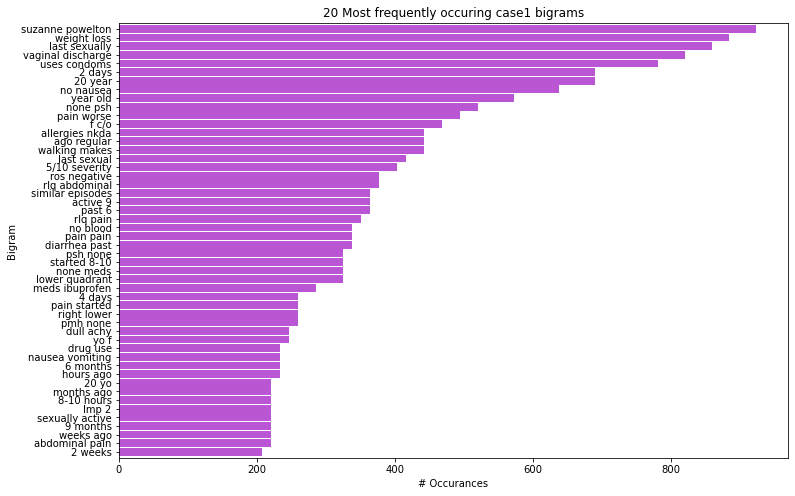

In [36]:
# Calculate Case 1 bigrams
case1_bigrams = (pd.Series(nltk.ngrams(case1_words, 2))
                      .value_counts()
                      .head(50))
# Vizualize top case1 Bigrams
case1_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case1 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case1_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

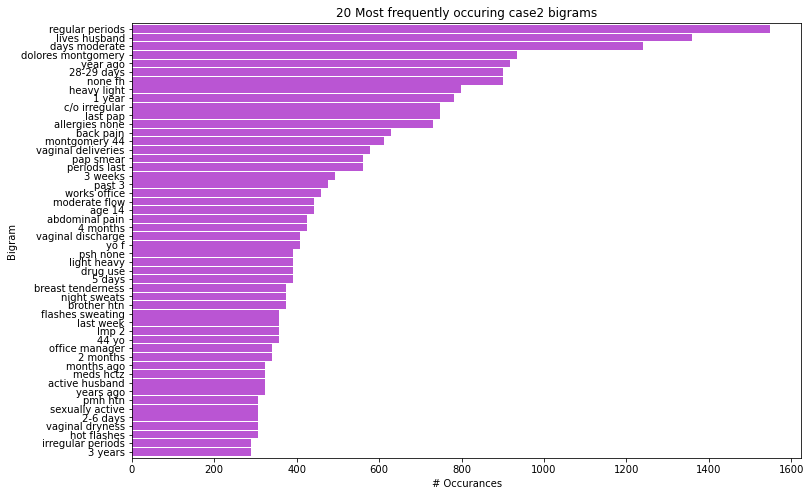

In [37]:
# Calculate Case 2 bigrams
case2_bigrams = (pd.Series(nltk.ngrams(case2_words, 2))
                      .value_counts()
                      .head(50))
# Vizualize top case2 Bigrams
case2_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))

plt.title('20 Most frequently occuring case2 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case2_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [59]:
notes.shape

NameError: name 'notes' is not defined

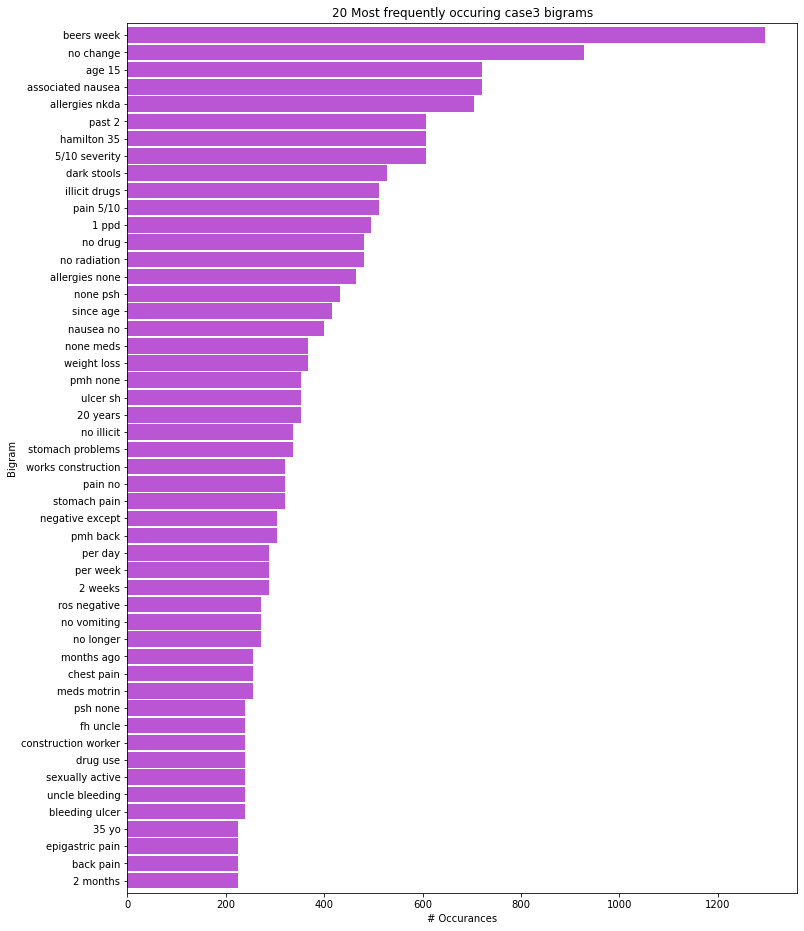

In [38]:
# Calculate Case 3 bigrams
case3_bigrams = (pd.Series(nltk.ngrams(case3_words, 2))
                      .value_counts()
                      .head(50))
# Vizualize top case3 Bigrams
case3_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 16))

plt.title('20 Most frequently occuring case3 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case3_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

In [54]:
pd.set_option('display.max_rows', 500)


In [58]:
df[df.feature_num==3].annotation

300                        ['intermittent episodes', 'episode']
301                    ['COMES AND GOES', 'HAPPENED 5-6 TIMES']
302                                            ['sporadically']
303                                   ['episodic', '5-6 times']
304                                               ['5-6 times']
305                                            ['1-2 episodes']
306                                    ['episodes', 'episodes']
307                                                ['episodes']
308                                             ['come and go']
309                                                ['episodes']
310                                 ['5-6 episodes', 'episode']
311                                    ['episodes', 'episodes']
312                                                          []
313                                                          []
314                                                          []
315                             ['OCCUR 

In [42]:
df.head(1)

,Unnamed: 0,id,case_num,pn_num,feature_num,feature_text,annotation,location,original,clean,stemmed,lemmatized,original_word_count
0,0,00016_000,0,16,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction,['dad with recent heart attcak'],['696 724'],"HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of ""heart beating/pounding out of my chest."" 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with ""thyroid disease,"" dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms",hpi 17yo presents palpitations patient reports 3-4 months intermittent episodes heart beating/pounding chest 2 days ago soccer game episode time chest pressure felt going pass lose conciousness note patient endorses abusing adderall primarily study 1-3 times per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fevers chills headache fatigue changes sleep changes vision/hearing abdominal paun changes bowel urinary habits pmhx none rx uses friends adderrall fhx mom thyroid disease dad recent heart attcak none immunizations date shx freshmen college endorses 3-4 drinks 3 nights / week weekends denies tabacco endorses trying marijuana sexually active girlfriend x 1 year uses condoms,hpi 17yo present palpit patient report 3-4 month intermitt episod heart beating/pound chest 2 day ago dure soccer game episod thi time chest pressur felt go pass lose concious note patient endors abus adderal primarili studi 1-3 time per week befor recent soccer game took adderral night befor morn game deni short breath diaphoresi fever chill headach fatigu chang sleep chang vision/hear abdomin paun chang bowel urinari habit pmhx none rx use friend adderral fhx mom thyroid diseas dad recent heart attcak none immun date shx freshmen colleg endors 3-4 drink 3 night / week weekend deni tabacco endors tri marijuana sexual activ girlfriend x 1 year use condom,hpi 17yo present palpitation patient report 3-4 month intermittent episode heart beating/pounding chest 2 day ago soccer game episode time chest pressure felt going pas lose conciousness note patient endorses abusing adderall primarily study 1-3 time per week recent soccer game took adderrall night morning game denies shortness breath diaphoresis fever chill headache fatigue change sleep change vision/hearing abdominal paun change bowel urinary habit pmhx none rx us friend adderrall fhx mom thyroid disease dad recent heart attcak none immunization date shx freshman college endorses 3-4 drink 3 night / week weekend denies tabacco endorses trying marijuana sexually active girlfriend x 1 year us condom,142


In [44]:
df[df.case_num==0].original

0                         HPI: 17yo M presents with palpitations. Patient reports 3-4 months of intermittent episodes of "heart beating/pounding out of my chest." 2 days ago during a soccer game had an episode, but this time had chest pressure and felt as if he were going to pass out (did not lose conciousness). Of note patient endorses abusing adderall, primarily to study (1-3 times per week). Before recent soccer game, took adderrall night before and morning of game. Denies shortness of breath, diaphoresis, fevers, chills, headache, fatigue, changes in sleep, changes in vision/hearing, abdominal paun, changes in bowel or urinary habits. \r\nPMHx: none\r\nRx: uses friends adderrall\r\nFHx: mom with "thyroid disease," dad with recent heart attcak\r\nAll: none\r\nImmunizations: up to date\r\nSHx: Freshmen in college. Endorses 3-4 drinks 3 nights / week (on weekends), denies tabacco, endorses trying marijuana. Sexually active with girlfriend x 1 year, uses condoms
1                      

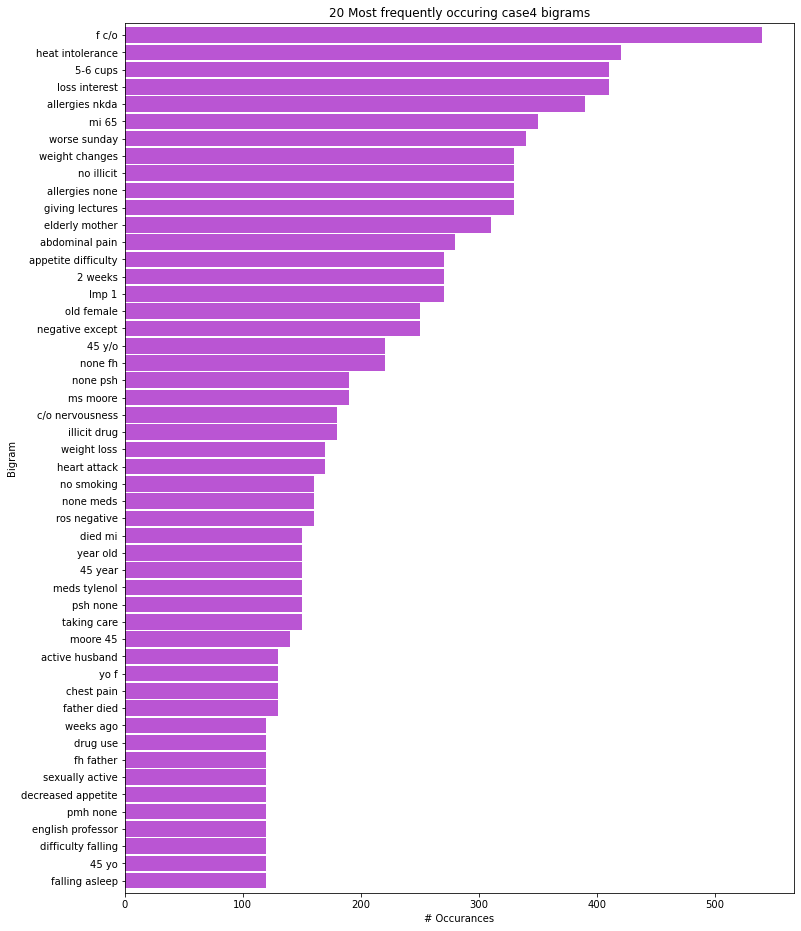

In [45]:
# Calculate Case 4 bigrams
case4_bigrams = (pd.Series(nltk.ngrams(case4_words, 2))
                      .value_counts()
                      .head(50))
# Vizualize top case4 Bigrams
case4_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 16))

plt.title('20 Most frequently occuring case4 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case4_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

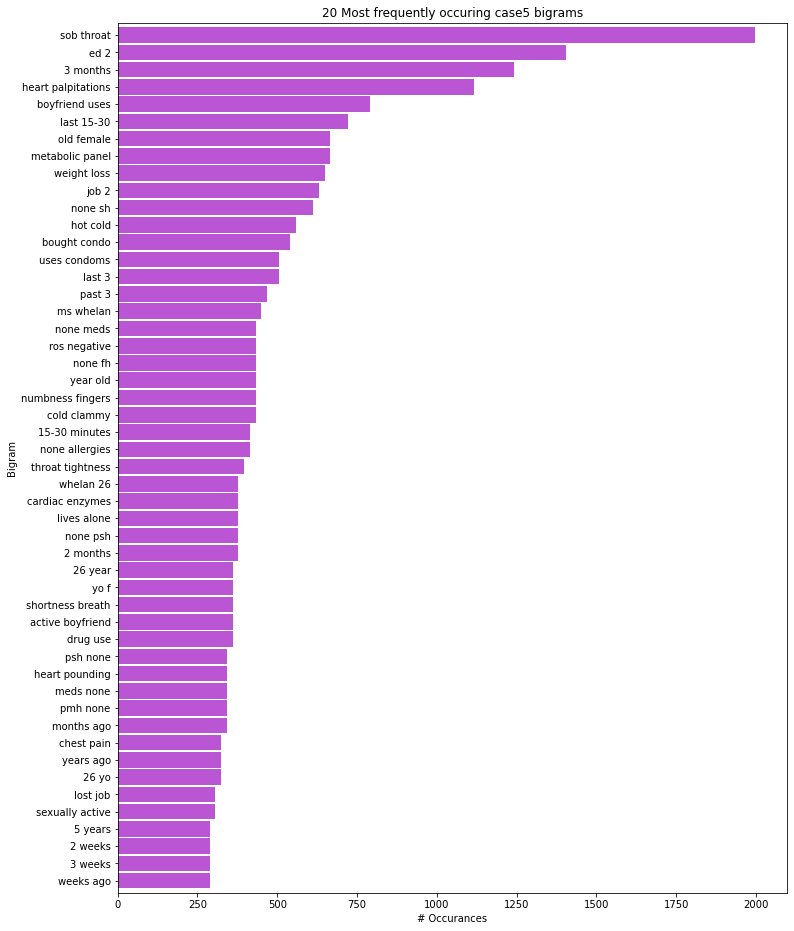

In [46]:
# Calculate Case 5bigrams
case5_bigrams = (pd.Series(nltk.ngrams(case5_words, 2))
                      .value_counts()
                      .head(50))
# Vizualize top case5 Bigrams
case5_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 16))

plt.title('20 Most frequently occuring case5 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case5_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

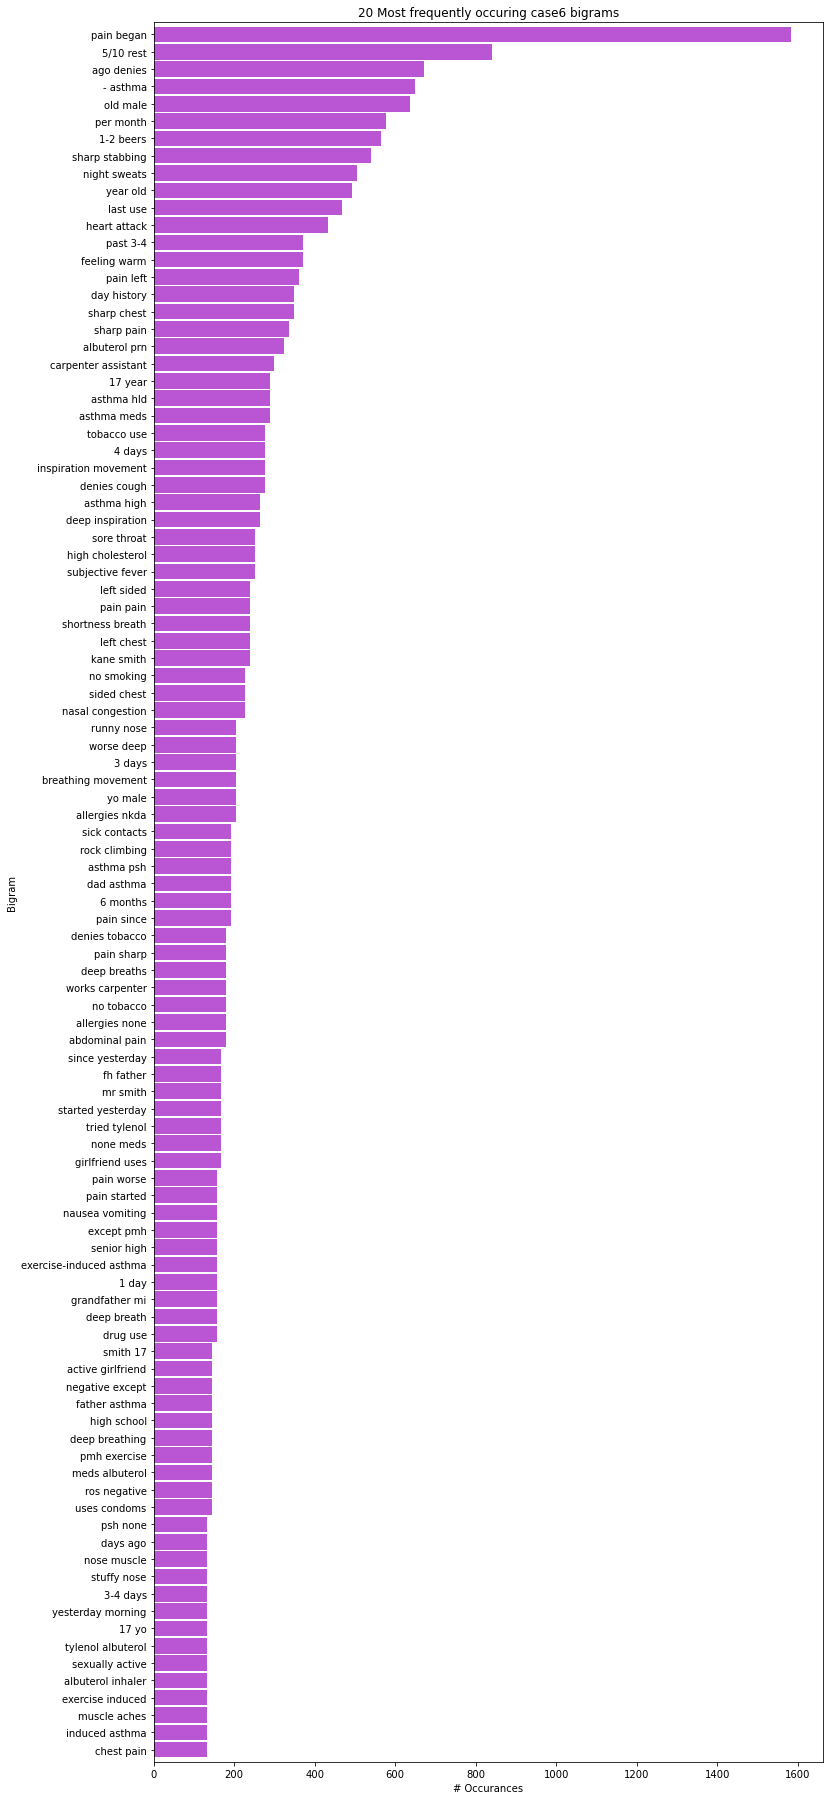

In [48]:
# Calculate Case 6 bigrams
case6_bigrams = (pd.Series(nltk.ngrams(case6_words, 2))
                      .value_counts()
                      .head(100))
# Vizualize top case6 Bigrams
case6_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 32))

plt.title('20 Most frequently occuring case6 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case6_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

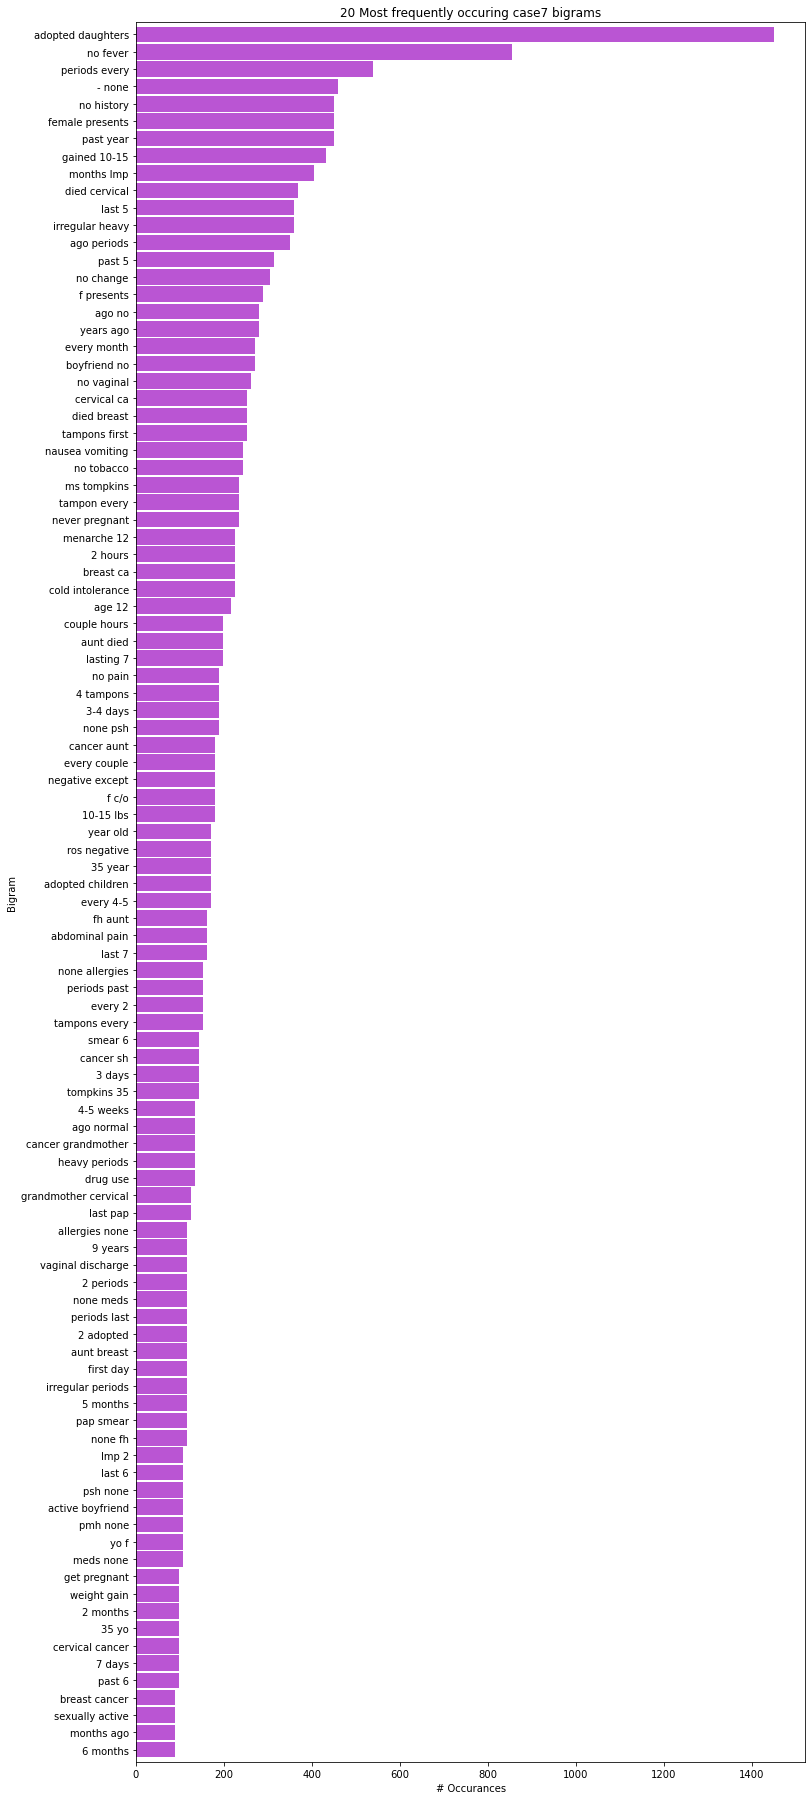

In [49]:
# Calculate Case 7 bigrams
case7_bigrams = (pd.Series(nltk.ngrams(case7_words, 2))
                      .value_counts()
                      .head(100))
# Vizualize top case7 Bigrams
case7_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 32))

plt.title('20 Most frequently occuring case7 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case7_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

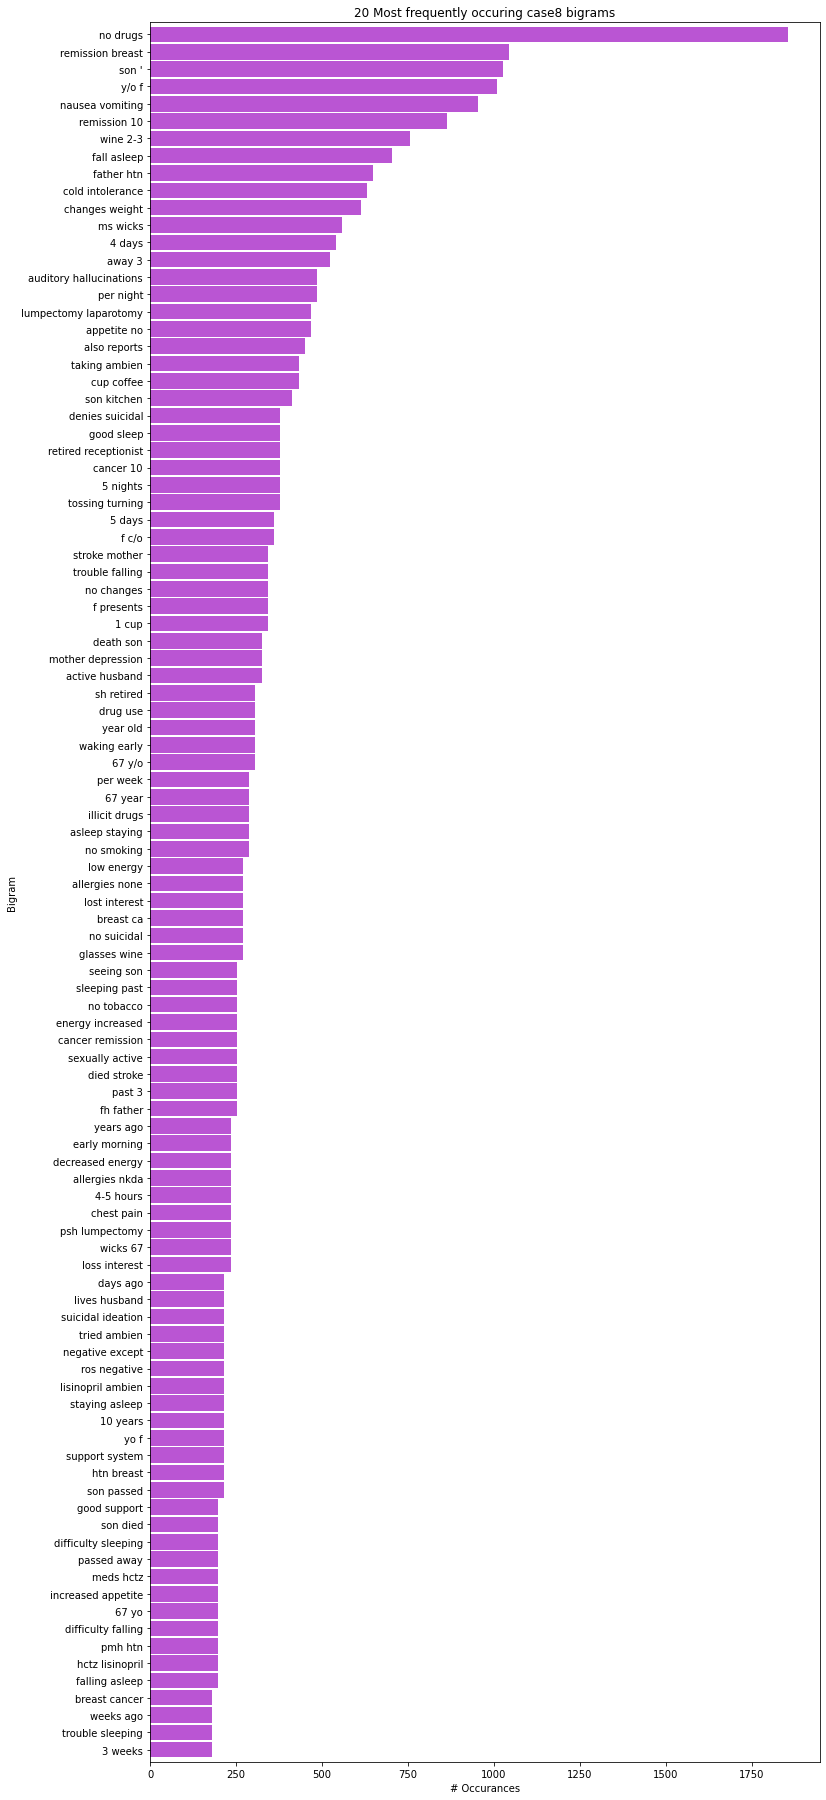

In [50]:
# Calculate Case 8 bigrams
case8_bigrams = (pd.Series(nltk.ngrams(case8_words, 2))
                      .value_counts()
                      .head(100))
# Vizualize top case8 Bigrams
case8_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 32))

plt.title('20 Most frequently occuring case8 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = case8_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

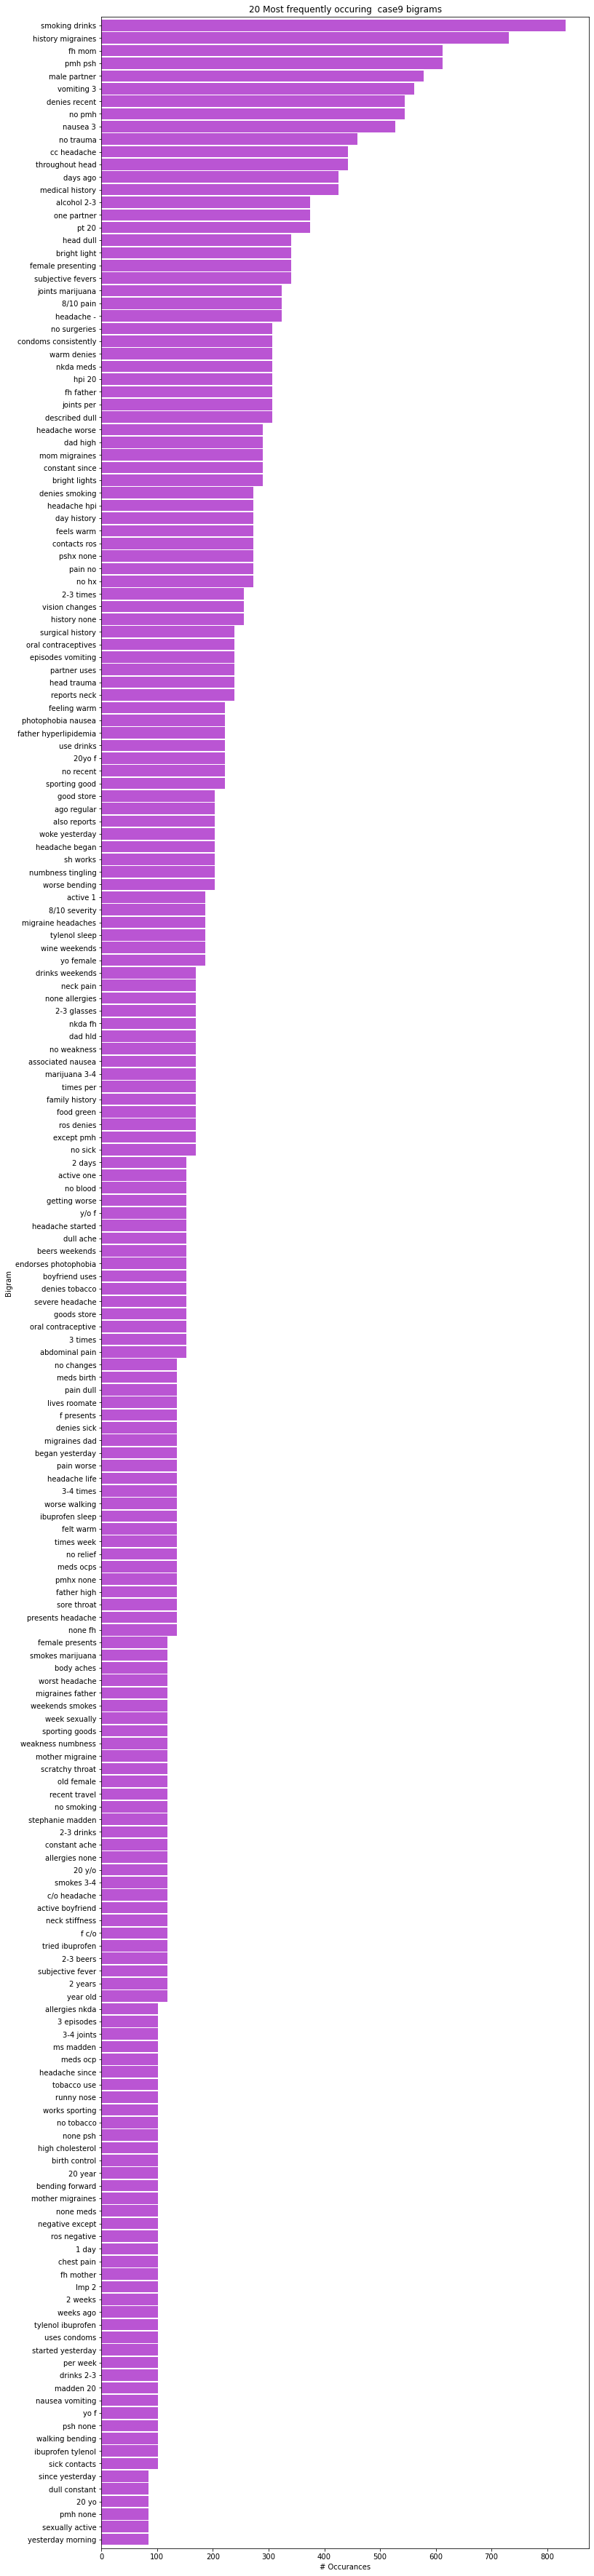

In [52]:
# Calculate Case 9 bigrams
case9_bigrams = (pd.Series(nltk.ngrams( case9_words, 2))
                      .value_counts()
                      .head(200))
# Vizualize top  case9 Bigrams
case9_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 64))

plt.title('20 Most frequently occuring  case9 bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels =  case9_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

[ ] Trigrams?

---

### Word Clouds

In [76]:
# Create word clouds for all words and language families
all_cloud = WordCloud(background_color = 'white', height = 1600, width = 800).generate(' '.join(all_words))
case0_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case0_words))
case1_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case1_words))
case2_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case2_words))
case3_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case3_words))
case4_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case4_words))
case5_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case5_words))
case6_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case6_words))
case7_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case7_words))
case8_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case8_words))
case9_cloud = WordCloud(background_color = 'white', height = 900, width = 800).generate(' '.join(case9_words))



---

Make one slide, three panel plot with distribution, bigrams, and wordcloud

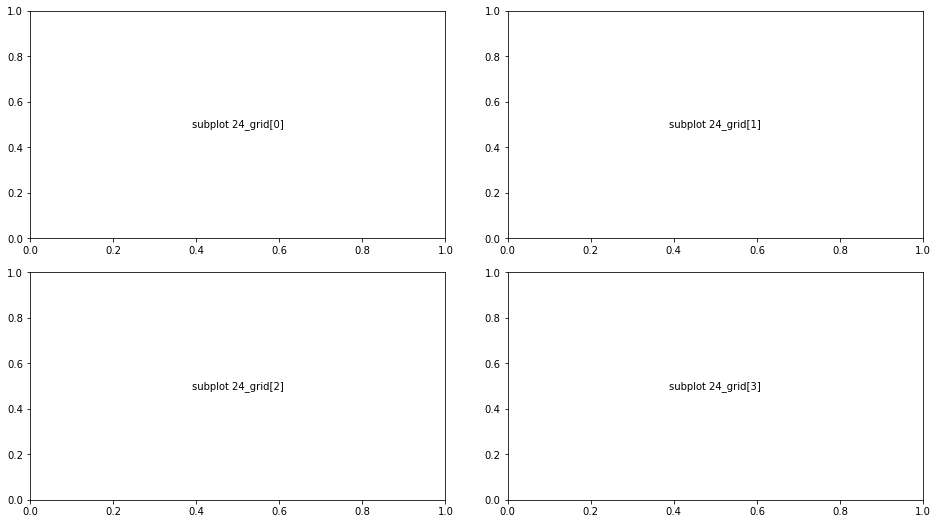

In [49]:
fig = plt.figure(figsize=(16,9))

rows = 2
columns = 2

grid = plt.GridSpec(rows, columns, wspace = .15, hspace = .15)

for i in range(rows*columns):
    exec (f"plt.subplot(grid{[i]})")
    plt.annotate('subplot 24_grid[' + str(i) + ']', xy = (0.5, 0.5), va = 'center', ha = 'center')



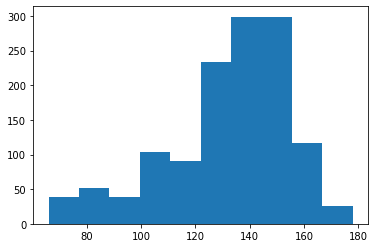

In [77]:
plt.hist(df[df['case_num']==0].original_word_count);


(-0.5, 799.5, 899.5, -0.5)

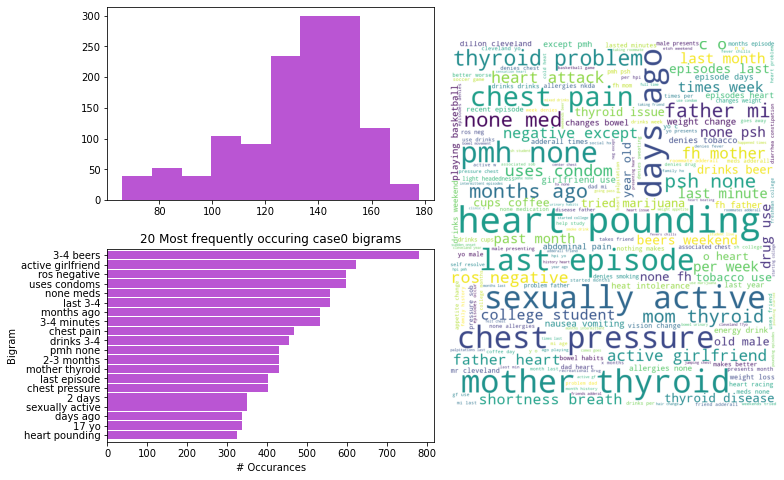

In [149]:
fig = plt.figure(figsize=(16,9))

rows = 2
columns = 2

grid = plt.GridSpec(rows, columns, wspace = .05, hspace = .25)

plt.subplot(grid[0,0])
plt.hist(df[df['case_num']==0].original_word_count, color ='mediumorchid');

plt.subplot(grid[1,0])
case0_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(12, 8))
plt.ylabel('Bigram')
plt.xlabel('# Occurances')
ticks, _ = plt.yticks()
labels = case0_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.title('20 Most frequently occuring case0 bigrams')


plt.subplot(grid[:,1])
plt.imshow(case0_cloud);
plt.axis('off')



(-0.5, 799.5, 899.5, -0.5)

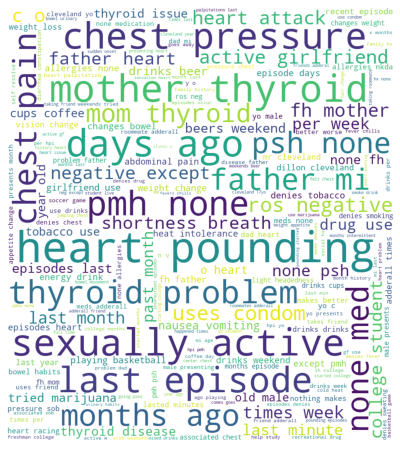

In [78]:
plt.figure(figsize=(10,8))
plt.imshow(case0_cloud);
plt.axis('off')

Getting warmer - Still want main title and change sizes of left column (make top thing smaller )

I guess if I did a 3x3 grid and different spans, that might worlk

(-0.5, 799.5, 899.5, -0.5)

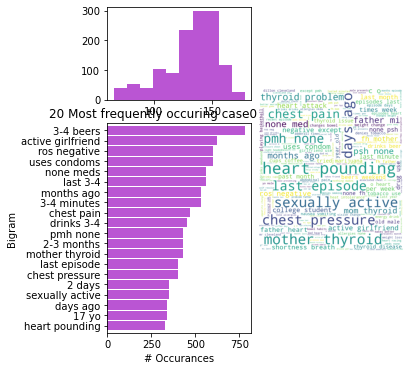

In [154]:
fig = plt.figure(figsize=(16, 9))

rows = 3
columns = 3

grid = plt.GridSpec(rows, columns, wspace = .05, hspace = .25)

plt.subplot(grid[0,0])
plt.hist(df[df['case_num']==0].original_word_count, color ='mediumorchid');

plt.subplot(grid[1:,0])
case0_bigrams.sort_values().plot.barh(color = 'mediumorchid', width=.9, figsize=(8, 6))
plt.ylabel('Bigram')
plt.xlabel('# Occurances')
ticks, _ = plt.yticks()
labels = case0_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)
plt.title('20 Most frequently occuring case0 bigrams')


plt.subplot(grid[:,1])
plt.imshow(case0_cloud);
plt.axis('off')



---

## Topic modeling exploration with pyLDAvis

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.


Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words

In [ ]:
import gensim

In [ ]:
nltk.download('stopwords')
stop=set(stopwords.words('english'))

In [ ]:
corpus=[]
new= df['original'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [ ]:
import nltk


In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
from nltk.stem import WordNetLemmatizer


In [ ]:
def preprocess_df(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for df in df['original']:
        words=[w for w in word_tokenize(df) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_df(df)

In [ ]:
dic=gensim.corpora.Dictionary(corpus)


In [ ]:
# Make bag of words corpus
bow_corpus = [dic.doc2bow(doc) for doc in corpus]


In [ ]:
#Create LDA Model
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 10, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

In [ ]:
import pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, bow_corpus, dic)
vis

### Named entity recognition

There are three standard libraries to do Named Entity Recognition:

- [Standford NER](https://nlp.stanford.edu/software/CRF-NER.shtml)
- [spaCy](https://spacy.io/api/data-formats#section-named-entities)
- NLTK

In [ ]:
!python -m spacy download en_core_web_sm


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
from spacy import displacy


In [ ]:
doc=nlp(df.original[1])

In [ ]:
df.head(1)

In [ ]:
df['doc'] = df.clean.apply(nlp)

In [ ]:
df.head()

In [ ]:
displacy.render(doc, style='ent')


---

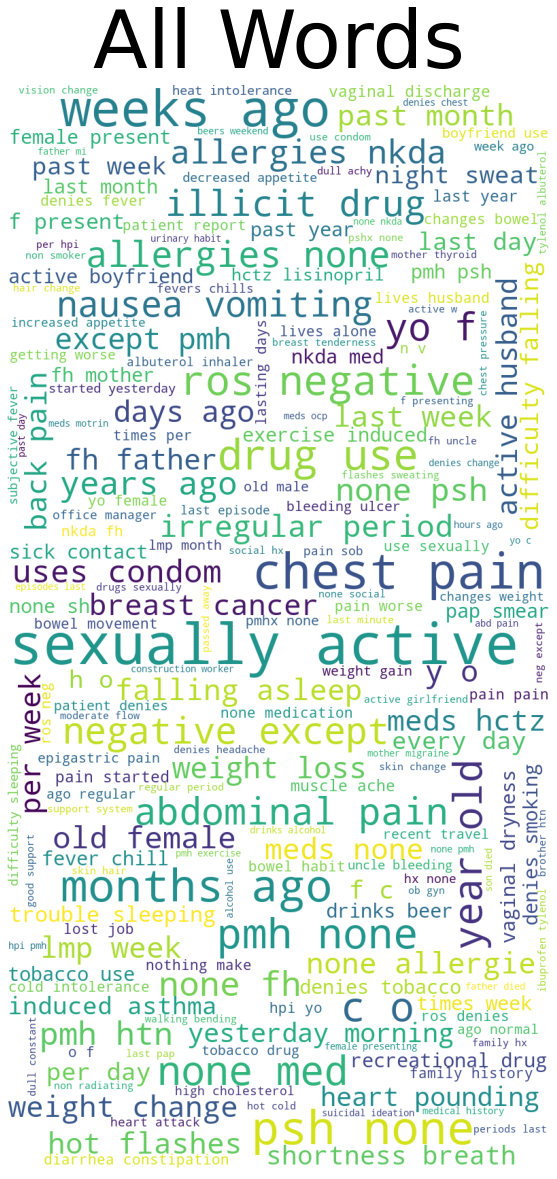

In [110]:
plt.figure(figsize = (10, 20))
plt.imshow(all_cloud);
plt.title('All Words', fontsize=80)
plt.axis('off');

In [75]:
plt.figure(figsize = (10, 8))
plt.imshow(case0_cloud);
plt.title('Case 0 Words', fontsize=60)
plt.axis('off')


NameError: name 'case0_cloud' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case1_cloud);
plt.title('Case 1 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case2_cloud);
plt.title('Case 2 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case3_cloud);
plt.title('Case 3 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case4_cloud);
plt.title('Case 4 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case5_cloud);
plt.title('Case 5 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case6_cloud);
plt.title('Case 6 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case7_cloud);
plt.title('Case 7 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case8_cloud);
plt.title('Case 8 Words', fontsize=60)
plt.axis('off')


In [ ]:
plt.figure(figsize = (10, 10))
plt.imshow(case9_cloud);
plt.title('Case 9 Words', fontsize=60)
plt.axis('off')


---

In [62]:
notes=pd.read_csv('patient_notes.csv')

In [63]:
notes.head()

,pn_num,case_num,pn_history
0,0,0,"17-year-old male, has come to the student health clinic complaining of heart pounding. Mr. Cleveland's mother has given verbal consent for a history, physical examination, and treatment\r\n-began 2-3 months ago,sudden,intermittent for 2 days(lasting 3-4 min),worsening,non-allev/aggrav\r\n-associated with dispnea on exersion and rest,stressed out about school\r\n-reports fe feels like his heart is jumping out of his chest\r\n-ros:denies chest pain,dyaphoresis,wt loss,chills,fever,nausea,vomiting,pedal edeam\r\n-pmh:non,meds :aderol (from a friend),nkda\r\n-fh:father had MI recently,mother has thyroid dz\r\n-sh:non-smoker,mariguana 5-6 months ago,3 beers on the weekend, basketball at school\r\n-sh:no std"
1,1,0,"17 yo male with recurrent palpitations for the past 3 mo lasting about 3 - 4 min, it happened about 5 - 6 times since the beginning. One time durign a baskeball game two days ago light headedness, pressure in the chest, catching breath, but no fainting. During teh episodes no sweating. No diarrhea, no heat intolerance, no weight loss. Has tried aterol to be able to better concentrate, has received it from his roommate. ."
2,2,0,"Dillon Cleveland is a 17 y.o. male patient with no significant PMH who presents with complaints of heart pounding. This has been going on for a few months and happens once or twice a month. He cannot think of any triggers, and it has occurred both with activity and at rest. Occasionally, it is accompanied by chest pressure but not pain that is located at the center of his chest. On one instance, he experienced chest pressure, lightheadedness and shortness of breath for 10 minutes with the heart pounding. \r\n\r\nOtherwise, he has not had shortness of breath, chest pain, anxiety, \r\n\r\nMedication: adderall twice a week as study aid (not prescribed)\r\nFH: mother - thyroid disease, father - heart attack at age 52, both living\r\nSH: no smoking; 3-4 drinks on the weekend per sitting; marijuanna once recently, no other recreational drugs"
3,3,0,"a 17 yo m c/o palpitation started 3 mos ago; \r\nNOTHING IMPROVES OR EXACERBATES THE SYMPTOMS ACCORDING TO HIM; IT CAN HAPPEN ANY TIME; MAY TAKE A FEW MINUTES; LAST TIME HAPPENED 2 DAYS AGO DURING PLAYING A GAME AND IT WAS ASSOCIATED WITH RETROSTERNAL PRESSURE LIKE DISCOMFORT; AND HE FELT LIGHTHEADED. BUT HE DID NOT LOSE CONCIOUSNESS AND DID NOT FALL. \r\nNOT ASSOCIATED WITH NAUSEA VOMITING; HEADACHE; ABDOMINAL PAIN; CHANGES IN URINATION OR BOWEL HABITS, OR TREMOR OR SKIN OR HAIR CHANGE OR INTOLERABC\r\n\r\nPMH NONE\r\nPSHH: NONE\r\nMEDS: ADEROL TO STAY AWAKE\r\nHOSP: NONE\r\nFH: MOTHER HAS THYROID DISEASE; FATHER HAS CAD X 1 YR\r\nSH: NO SMOKING; DRINKING ON WEEKENDS CAGE 0/4; ONE TIME USE OF MARIJUANA\r\n\r\n\r\n"
4,4,0,"17yo male with no pmh here for evaluation of palpitations. States for the last 3-4mo he has felt that his heart with intermittently ""beat out of his chest,"" with some associated difficulty catching his breath. States that the most recent event was 2 days ago, and during activity at a soccer game. He does not seem to note any specific precipitatinig factors at this time. He also states that he feels as if he will faint during these events, but has not lost consciousness at any point. Furthermore, he does endorse theses attacks occuring 1-2 times a month and peak at 4 mins. He denies any stressors at home. ROS: denies weight loss, fevers, recnet illness, change in bowel habits. PMH: negative, PSH negative, FHX mom with thyroid disorder, dad with heart condition and MI at 52yo. SHX no tobacco, ETOH on weekends, Marijuana tried a month ago. Med: is taking some of roommates Adderoll intermittently (last was 2 days ago prior to event). KNDA"


In [65]:
#Make word lists by case_num_xs from pn_history words
all_notes_case0_words = ' '.join(notes[notes.case_num == 0].pn_history).split()
all_notes_case1_words = ' '.join(notes[notes.case_num == 1].pn_history).split()
all_notes_case2_words = ' '.join(notes[notes.case_num == 2].pn_history).split()
all_notes_case3_words = ' '.join(notes[notes.case_num == 3].pn_history).split()
all_notes_case4_words = ' '.join(notes[notes.case_num == 4].pn_history).split()
all_notes_case5_words = ' '.join(notes[notes.case_num == 5].pn_history).split()
all_notes_case6_words = ' '.join(notes[notes.case_num == 6].pn_history).split()
all_notes_case7_words = ' '.join(notes[notes.case_num == 7].pn_history).split()
all_notes_case8_words = ' '.join(notes[notes.case_num == 8].pn_history).split()
all_notes_case9_words = ' '.join(notes[notes.case_num == 9].pn_history).split()
all_notes_all_words = ' '.join(notes.pn_history).split()


In [66]:
len(all_notes_all_words)

5709349

In [68]:
features=pd.read_csv('features.csv')

In [69]:
features.head()

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded


In [72]:
features

,feature_num,case_num,feature_text
0,0,0,Family-history-of-MI-OR-Family-history-of-myocardial-infarction
1,1,0,Family-history-of-thyroid-disorder
2,2,0,Chest-pressure
3,3,0,Intermittent-symptoms
4,4,0,Lightheaded
5,5,0,No-hair-changes-OR-no-nail-changes-OR-no-temperature-intolerance
6,6,0,Adderall-use
7,7,0,Shortness-of-breath
8,8,0,Caffeine-use
9,9,0,heart-pounding-OR-heart-racing
